In [50]:
import xarray as xr
import numpy as np
import windrose
wbFile = "/home/anna/Downloads/202012_Kystverket-Smartbuoy-Fauskane_AanderaaMotusSensor.nc"
wbData  = xr.open_dataset(wbFile);
swellPeriodArr=wbData['Wave_Peak_Period_Swell']
swellDirArr=wbData['Wave_Peak_Direction_Swell']
lat=np.squeeze(wbData['latitude'])
lon=np.squeeze(wbData['longitude'])
swellDirArr= np.squeeze(swellDirArr.astype(int))
#print(waveDirArray)
swellPeriodArr = np.squeeze(swellPeriodArr.round(2))
swellPriodArrV = swellPeriodArr.values
wbData.close()

/home/anna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


0.5


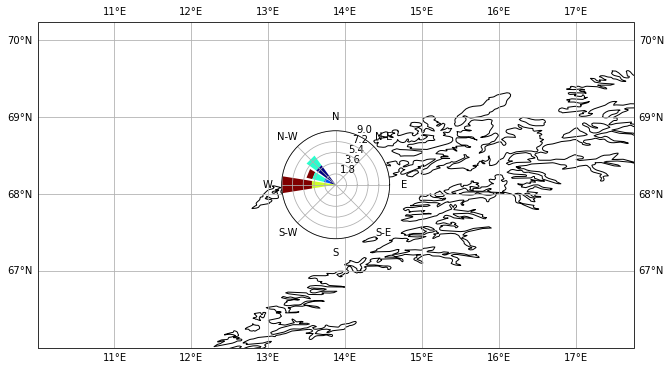

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt



minlon, maxlon, minlat, maxlat = (10, 17.75, 66, 70.24)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
fig.set_alpha(0.5)
# Draw main ax on top of which we will add windroses

main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
#main_ax.set_alpha(0.5)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()


main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_alpha(0.5)

height_deg = 0.1
wrax = inset_axes(main_ax,
        width=1.5,                             # size in inches
        height=1.5,                            # size in inches
        #width="20%",                             # size in inches
        #height="20%",  
        loc='center',                        # center bbox at given position
        #bbox_to_anchor=(lon-height_deg/2, lat-height_deg/2, height_deg, height_deg),
        #bbox_to_anchor=(lon, lat), # position of the axe
        #bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,   # specify the class of the axe
        axes_kwargs={"alpha" : 0.1}
        )
wrax.set_alpha(0.5)
print(wrax.get_alpha())


wrax.bar(swellDirArr,swellPriodArrV)




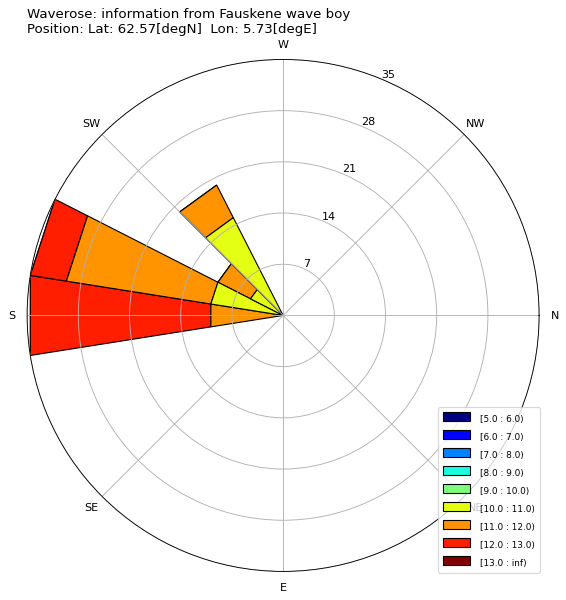

In [58]:

periodMin = 5
periodMax = 14
periodStep = 1
periodBins = np.arange(periodMin, periodMax, periodStep)
dirBins = 20 # 360 degrees/20 = 18 degrees each

ax = windrose.WindroseAxes.from_ax()
#ax.set_theta_zero_location('N')
ax.set_rticks([10, 11, 12, 13])
ax.set_xticklabels(['N', 'NW',  'W', 'SW', 'S', 'SE','E', 'NE'])
title = 'Waverose: information from Fauskene wave boy  \n' \
        'Position: Lat: {:0.2f}[degN]  Lon: {:0.2f}[degE]'.format(lat.data[0] ,  lon.data[0])  
im1=ax.bar(swellDirArr,swellPriodArrV, bins=periodBins, nsector=dirBins, normed=True, opening=1, edgecolor='k', label='Period')
#ax.legend(title='Period')
ax.set_legend(prop={'size': 'large'}, loc="lower right")


plt.title(title,loc='left')
plt.show()

/home/anna/.local/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


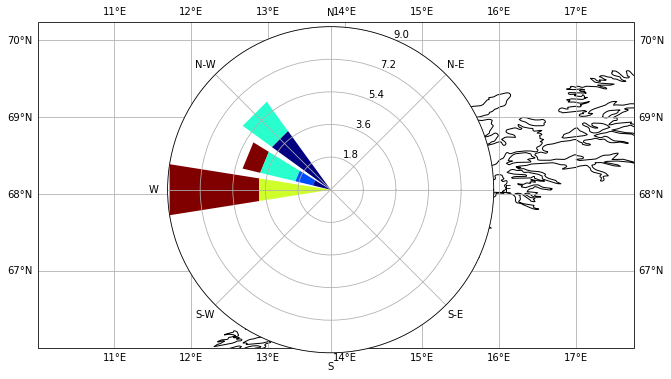

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import inset_axes
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

#tutaj
ws = np.random.random(500) * 6
wd = np.random.random(500) * 360

minlon, maxlon, minlat, maxlat = (10, 17.75, 66, 70.24)

proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12, 6))
# Draw main ax on top of which we will add windroses
main_ax = fig.add_subplot(1, 1, 1, projection=proj)

height_deg = 0.1
wrax = inset_axes(main_ax,
        width="100%",                             # size in inches
        height="100%",                            # size in inches
        
        #loc='center',                        # center bbox at given position
        #bbox_to_anchor=(lon-height_deg/2, lat-height_deg/2, height_deg, height_deg),
        #bbox_to_anchor=(lon, lat), # position of the axe
        #bbox_transform=main_ax.transData,    # use data coordinate (not axe coordinate)
        axes_class=windrose.WindroseAxes,   # specify the class of the axe
       # axes_kwargs={"alpha" : 0.5}
        )
wrax.set_alpha(0.5)

wrax.bar(swellDirArr,swellPeriodArr)


main_ax = fig.add_subplot(1, 1, 1, projection=proj)
main_ax.set_extent([minlon, maxlon, minlat, maxlat], crs=proj)
#main_ax.set_alpha(0.5)
main_ax.gridlines(draw_labels=True)
main_ax.coastlines()